# Implementation and evaluation of K-nearest neighbors (KNN) algorithm for handwritten digit recognition
### Data Analysis MoBi SoSe2022, Topic 01: Biomedical Image Analysis
### Tutorin: Marie Becker
### Team 02: Lena Fleischhacker, Pia Röhrich, Hellen Röttgen, Benjamin Wehnert
#### July 2022

# Abstract

# Table of contents

1. [Introduction](#Introduction)
2. [Imports](#Imports)
3. [Material](#Material)
4. [Methods](#Methods) <br>
    i. Z-tranformation (#Z-transformation) <br>
    ii. Principal component analysis <br>
    iii. k-nearest neighbors <br>
    iv. Finding optimal k and number of PC's <br>
    v. Expanded code <br>
        a. average numbers <br>
        b. PCA with SVD <br>
        c. Self-written digit recognition <br>
5. [Results](#Results)
    i. Z-tranformation <br>
    ii. Principal component analysis <br>
    iii. k-nearest neighbors <br>
    iv. Finding optimal k and number of PC's <br>
    v. Expanded code <br>
        a. average numbers <br>
        b. PCA with SVD <br>
        c. Self-written digit recognition <br>
6. [Discussion](#Discussion)
7. [Bibliography](#Bibliography)



# Introduction
The main goal of the project is to write an algorithm that accurately recognizes handwritten digits from the MNIST dataset using the K-nearest neighbors method. Digit recognition is a form of pattern recognition which describes the operation of identifying digits from images. This is not an easy task, taking into consideration that handwritten numbers are not written in the same style. Thus, the categories are harder to classify. With almost all processes in everyday life being digitalized, e.g. banking transactions or contact forms, developing such algorithms has become extremely useful and almost inevitable.

For this reason, the MNIST data set has been well studied and analyzed over the past decades, leading to the development of algorithms that recognize digits with the same accuracy as humans. This laid the foundation for the development of more advanced pattern recognition algorithms such as detecting house numbers from photos with the SVHN (Street View house numbers) dataset. These algorithms can be very useful for future applications like better navigation systems.

However, in order to properly understand the fundmentals of machine learning, it is useful to reproduce the basic steps of digit recognition using the MNIST data set.

First of all, the data is z-transformed for easier handling. Prior to the implementation of Knn, a Principal Component Analysis (PCA) is implemented to minimize computing power by reducing dimensionality.The PCA-transformed data is used for digit recognition based on the Knn method (k-nearest neighbors).

Additionally, the digit recognition algorithm was used to recognize self-written digits instead of those from the test data set.


# Imports
For the algorithm and the visualization of the results, several functions from the packages numpy, pandas, seaborn and matplotlib were used. For more clarity, self-written functions are stored in other notebooks and are therefore accessed through modules as well.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import Functions.PCA as pca
import Functions.data_load as dat
import Functions.visualization as vis
import Functions.average_img as avg

train_array, test_array = dat.load_data()
cleaned_arr = dat.clean_train_arr()
z_arr = pca.z_arr(cleaned_arr)
reduced_arr = pca.arr_only(z_arr, pca.create_sorted_eigenvec(30))

# Material
The data set used for the project is the standardized MNIST data set. MNIST stands for "Modified National Institute of Standard and Technology database". The data set consists of 70000 images which are divided into a training data set comprising 60000 images and a test data set comprising 10000 images. Each image shows a handwritten digit ranging from zero to nine. The digits were written by american office emloyees and high school students.

The images are stored as grayscaled comma-seperated values (csv) files. Each image consists of 28 x 28 = 784 pixels with intensity values ranging from 0 to 255. This means that all training images can be displayed in a 60000 x 785 matrix with the first column giving the number visible in the image. Consequently, the test images can be dispalyed as a 10000 x 785 matrix.

For algorithm-writing, only the training data is used. Otherwise, the accuracy of the algorithm is adulterated because it is fitted to the test data.

Example images from the train array and test array are displayed in the following:

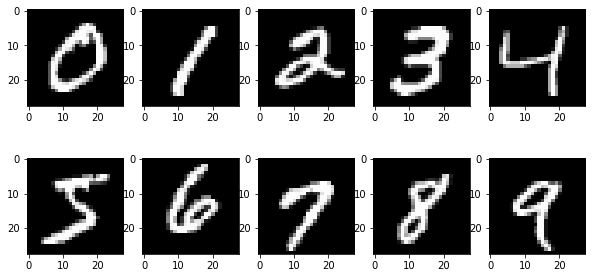

In [7]:
vis.ten_digits(train_array)

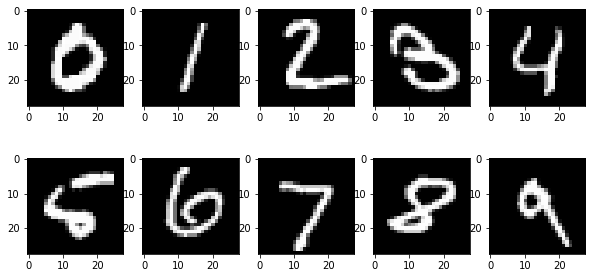

In [6]:
vis.ten_digits(test_array)

# Methods
flow cart with steps

## Z-Transformation (PCA preparation)
Using the z-transformation, values of a sample are converted to z-scores. The distribution of these z-scores has a mean of 0 and a standard deviation of 1. Z-scores make the sample comparable by making the data non-dimensional. The z-scores are calculated as follows:

$$ Z = \frac{\left(X_i-\bar{X}\right)}{\sigma_{x}} $$

Applied to the project, this means that the average intensity and standard deviation for each pixel need to be calculated. After that, each pixel in each of the images needs to be z-transformed. This adjusts the brightness of the images.

Some pixels, such as those in the corners, have an intensity of zero in all images. Following from this, the mean and thus the standard deviation will also be zero. As a division by zero is not possible, these pixels can not be z-transformed. Therefor, a cleaned data set (cleaned_train_array) was created in which all colums with zeroes only are deleted. Of course, the same columns are also deleted from the images fed to the algorithm later. The cleaned training array can be accessed using the function clean_train_arr. 

The algorithm for the z-transformation of the training array can be accessed through the self-written function z_arr. The function z_transformation additionally z-tranforms an image using the means and standard deviation of the training data. For shorter run times,  the z-transformed array was stored an can be accessed through the function load_z_arr_train.

## Principal Component Analysis (PCA)

PCA is used for dimensionality reduction and therefor implemented ahead of Knn. Knn is a lazy learning algorithm, meaning that instead of learning from the training data, the algorithm simply compares input with the trainig data each time it runs. Consequently, a dimension reduction shortens the run time.

Despite losing dimensions, hardly any information should be lost. Therefore, the first step of a PCA is to identify the correlation between different features of the dataset and putting those values into a correlation matrix. This is done by using the Pearson correlation which is calcualted as follows:

$$ Corr(x,y) = \frac{1}{{N-1}}\sum_{i=1}^N\frac{(x_i-\overline{x})}{s_x}\frac{(y_i-\overline{y})}{s_y}\ $$

After this step, the eigenvectors v and eigenvalues λ of the covariance matrix A are calculated. The relationship between a matrix, eigenvectors and eigenvalues is expressed in the following equation:

$$ Av_i=λ_iv_i $$

If calculated by hand, the eigenvalues need to be calculated in order to find the eigenvectors. The eigenvalues are the diagonal entries of a matrix S which can be found through diagonalisation of A, satisfying the following equation:

$$ S=\frac{1}{N-1}\, (X_{CS}V)'\, (X_{CS}V) $$

Spatially, the diagonalization describes a rotation of the correlation matrix. This allows to look at the data points from a different angle, defining new axes/features called principal components. These are inserted into a new matrix and sorted according to their corresponding eigenvalues. The higher the eigenvalue, the higher the amount of variance covered. 

From eigenvalue matrix, a certain number k of principal components is chosen, a step that is further explained under finding the optimal k and number of PC's.

The last step of a PCA is the transformation of the original data matrix with the principal components. This is done by computing the dot product of A with a matrix made up of the top k eigenvectors, resulting in the transformed data matrix.

In summary, the principal components allow us to reduce dimensions and run time by leaving out highly correlated information.

In the project, these steps were implemented using a self-written PCA function. In this case, the features are the intensity values. The algorithm follows the steps mentioned above mainly using numpy functions. However, instead of calculating the Pearson Correlation in the first step, just the covariance is calculated as the division by the standard deviation becomes unnecessary due to the the previous z-transformation.


## K-nearest neighbors (Knn)
K-nearest neighbors (Knn) is the machine learning algorithm that was used to classify the numbers. It is a simple, supervised machine learning algorithm.



## Finding optimal k and number of PC's

## Expanded code

hier könnte ihr flowchart stehen

### Average images

To get a first impression of how related the images in the data set are, an algorithm calculating average digits was implemented. The according steps were saved in the avg_digit_img function. 

The calculation is done by 
 1. Choosing all images from the training data set containing one same number
 2. Summing up the intensity values for each pixel of these images
 3. Dividing the intensity sum by the number of images used

In the nect step, the average images are used for digit recognition. Function?
This is done by substracting the instensity values of the average digit from the image given. The algorithm identies the image as the digit with the lowest intensity difference. 

### PCA with singular value decomposition (SVD)

Instead of using the eigenvector decomposition of the correlation matrix to calculate the principal components, singular value decomposition (SVD) can be applied. The main difference between the two decomposition methods is that the matrices do not need to be square matrices for SVD. All matrices satisfy the following equation:

$$ M = USV^{T} $$

The columns of the matrix V are used as the principal components. The corresponding function is called PCA_SVD. It identifies the principal components as explained and computes the dor product of tha data matrix with the top k eigenvectors.


### Self-written digit recognition

In addition to using the PCA und Knn algorithm to recognize numbers from the MNIST data set, it is used to recognize digits that were handwritten on an iPad. THe function is labeled load_jpg.It comprises the following steps:

1. importing a jpeg image of the handwritten digit into the notebook using functions from the pillow package.
2. reformatting the image to make it comparable with training images from MNISt data set <br>
    i.  conversion to grayscale <br>
    ii.  reshaping the jpeg into a numpy array <br>
    iii.  deleting rows and columns so that tha overall number of pixels is divisible by 28 <br>
    iv. reducing the number of pixels in the image to 784 by averaging squares of pixels and creating a 28x28 image from the means <br>
3. apply z-transformation, PCA and Knn algorithms to image


# Results


## 4.i.) Results Z-Transformation

## 4.ii.) Results PCA

## 4.iii.) Results kNN

## Results Finding optimal k and number of PC's

## Results expanded code 

### Average images


### PCA with singular value decomposition (SVD)


### Self-written digit recognition

### 4.iv.) Self-written digit recognition
The self-written digit recognition has an accuracy of ??





In [ ]:
#code showing screenshot and 28x28 pixel picture

# 5) Discussion


Good recognition of numbers handwritten in american style but not european style

# 6) Bibliography
Netzer, Y. et al. "Reading Digits in Natural Images with Unsupervised Feature Learning." Proceedings of the Workshop on Neural Information Processing Systems (2011)